## Import and configuration

In [116]:
import os
import pandas as pd

In [117]:
DATASET_PATH = "datasets/titanic"

## Load Titanic datasets

In [118]:
def load_train_dataset():
    csv_path = os.path.join(DATASET_PATH, 'train.csv')
    return pd.read_csv(csv_path)

In [119]:
def load_test_dataset():
    csv_path = os.path.join(DATASET_PATH, 'test.csv')
    return pd.read_csv(csv_path)

In [120]:
titanic_train = load_train_dataset()

In [121]:
titanic_test = load_test_dataset()

## Inspect dataset

In [122]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
titanic_train.shape

(891, 12)

In [124]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


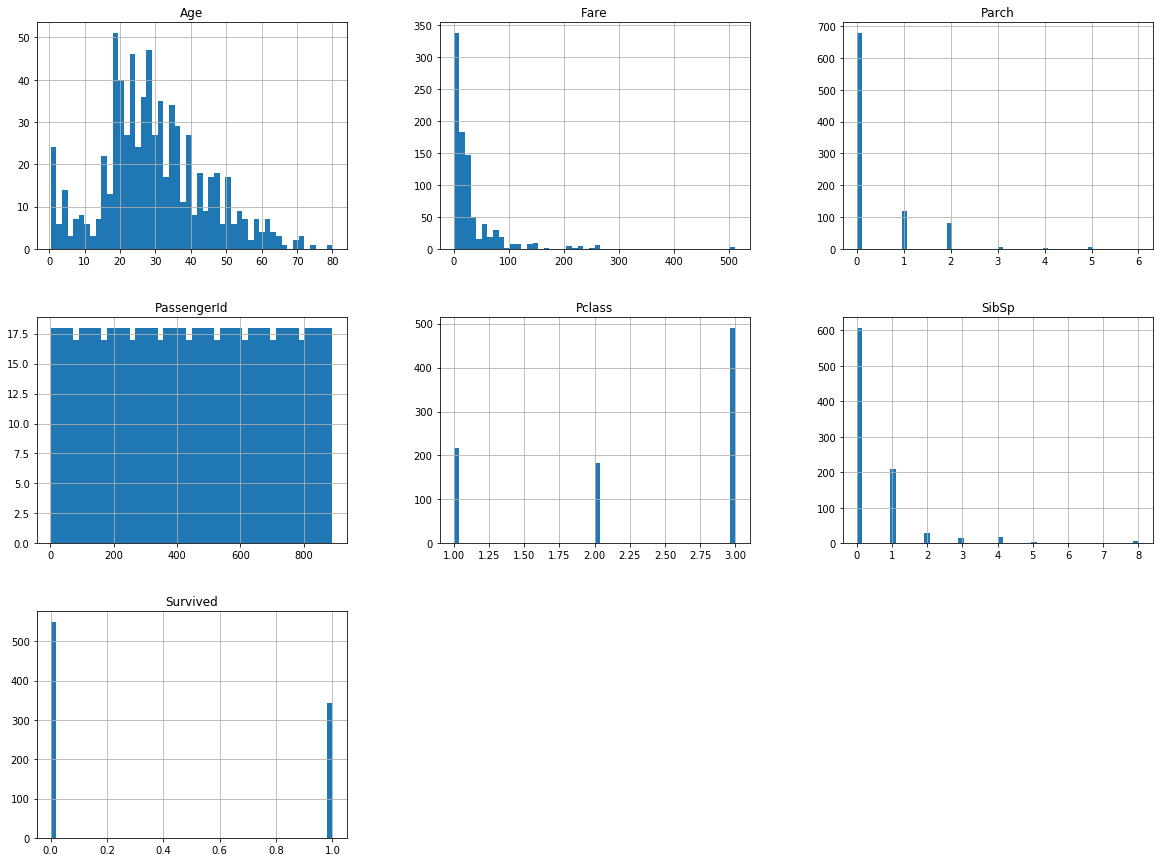

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [126]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data transformation

In [127]:
# Add a column to represent if a passenger had a cabin or not
titanic_train['CabinBool'] = titanic_train['Cabin'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [128]:
# Drop column "Cabin" because it's not useful anymore
titanic_train = titanic_train.drop("Cabin", axis=1)

In [129]:
# Drop also Name, Ticket and Embarked as they are not relevant for the anlysis
titanic_train = titanic_train.drop("Name", axis=1)
titanic_train = titanic_train.drop("Ticket", axis=1)
titanic_train = titanic_train.drop("Embarked", axis=1)

In [130]:
# Encode male/female values to numbers - female -> 0, male -> 1
from sklearn.preprocessing import LabelEncoder
sex_cat = titanic_train["Sex"]
encoder = LabelEncoder()
sex_cat_encoded = encoder.fit_transform(sex_cat)
titanic_train["SexEncoded"] = sex_cat_encoded
titanic_train = titanic_train.drop("Sex", axis=1)

In [131]:
# Substitute all NaN values with their median (in this case only Age column have them)
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(titanic_train)
X = imputer.transform(titanic_train)
titanic_train = pd.DataFrame(X, columns=titanic_train.columns)

## Data splitting

In [132]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(titanic_train, test_size=0.2, random_state=42)

In [133]:
# Put PassengerId column aside and remove it from original dataset
train_set_passengers_ids = train_set["PassengerId"].copy()
train_set = train_set.drop("PassengerId", axis=1)

test_set_passengers_ids = test_set["PassengerId"].copy()
test_set = test_set.drop("PassengerId", axis=1)

In [134]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["Survived"].copy()
train_set = train_set.drop("Survived", axis=1)

test_set_labels = test_set["Survived"].copy()
test_set = test_set.drop("Survived", axis=1)

In [135]:
# Apply StandardScaler
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()
train_scaler.fit(train_set)
train_set_scaled = train_scaler.transform(train_set)

test_scaler = StandardScaler()
test_scaler.fit(test_set)
test_set_scaled = test_scaler.transform(test_set)

## Select and train a model

We test different models and check their score against the test set

### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_scaled, train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
# Test the score of the training
lin_reg.score(train_set_scaled, train_set_labels)

0.38518867710129079

In [138]:
# Test the score of the model using the test set
lin_reg.score(test_set_scaled, test_set_labels)

0.43961863321567751

### Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_scaled, train_set_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [140]:
# Test the score of the training
tree_reg.score(train_set_scaled, train_set_labels)

0.95597783284350446

In [141]:
# Test the score of the model using the test set
tree_reg.score(test_set_scaled, test_set_labels)

-0.63564993564993566

### Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier()
rf_cls.fit(train_set_scaled, train_set_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
# Test the score of the training
rf_cls.score(train_set_scaled, train_set_labels)

0.9662921348314607

In [144]:
# Test the score of the model using the test set
rf_cls.score(test_set_scaled, test_set_labels)

0.78212290502793291